<h1>Implementación Adaline (Neurona Lineal Adaptativa) para Regresión Logística</h1>

**Cambios:**<br>


*   Se cambia función de coste por la función de coste logistico. *(logaritmos)*
*   Se cambia la función de <strong>activación lineal</strong> por la <strong>función sigmoide.</strong>
*   Se cambia la función de umbral para devolver valor entre 0 y 1 en lugar de -1 a 1



In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [12]:
class LogisticRegressionGD(object):
    """ Regresion logistica con Gradient Descent """

    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calcula la entrada de la red"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Funcion de activacion sigmoide"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Retorna el label de la clase: 0 o 1"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Generador de marcadores y colores.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # superficie
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

**Pruebas de clasificaicon con datos de iris**


In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**Entranamiento y visualización**

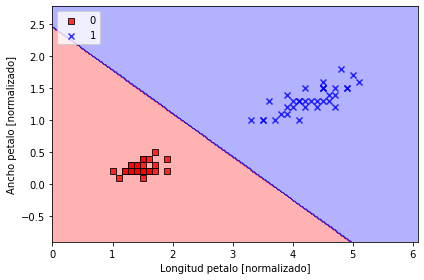

In [13]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Longitud petalo [normalizado]')
plt.ylabel('Ancho petalo [normalizado]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()